# Carga de datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
titanic = pd.read_csv('/content/drive/MyDrive/datasets/titanic.csv')

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/datasets/age_salary_hours.csv')[0:200]
dataset.head(2)

,Age,Annual Salary,Weekly hours,Education
0,72,160000.0,40.0,Bachelor's degree or higher
1,72,100000.0,50.0,Bachelor's degree or higher


In [ ]:
iris = pd.read_csv('/content/drive/MyDrive/datasets/iris.csv')
iris.head(2)
iris['long']=iris['sepal_length'] / iris['sepal_width']
iris['width']=iris['petal_length'] / iris['petal_width']
iris['dimension_petalo'] = iris['petal_length'] + iris['petal_width']

# Visualización

A lo largo de vuestra carrera como analistas o científicos de datos, manejaréis datos. Los datos, sin una narrativa o una representación que los sustente, pierden valor para aquellos que no tienen ni tiempo ni conocimientos para interpretarlos. Asimismo, una buena representación de los datos en forma de gráficos puede ayudaros a extraer conclusiones de forma más rápida e intuitiva que por el mero análisis de la información.

Algunas de las ventajas que encontraréis al representar de forma gráfica los datos son:

1. Facilidad de entender conjuntos de datos complejos.
2. Presentar fenómenos complejos de forma comprensible para no expertos: segmentaciones, datos atípicos, etc.
3. Exploración de datos mediante visualizaciones interactivas.
4. Narrar una historia a través de los datos.

La visualización de datos es mucho más que saber manejar con destreza las librerías y para representar los datos. Si os interesa, podéis revisar este [enlace](https://www.storytellingwithdata.com/) y, sobretodo, el libro Storytelling with data.

En general hay muchos tipos de gráficos, pero la selección de qué gráfico usar dependerá del contexto (si es una exposición más o menos formal, si es un análisis exploratorio, etc), de los datos que queremos representar o de lo que queremos contar.

Esta [guía de Goolge](https://cloud.google.com/blog/products/data-analytics/different-types-graphs-charts-uses) es una buena referencia para seleccionar un tipo de gráfico para un contexto determinado.


# Nueva sección

# Matplotlib

Matplotlib es una librería de visualización multiplataforma de Python. Internamente se basa en  NumPy pero se integra perfectamente con Pandas.

Una de las características más destacables de Matplotlib es su versatilidad y capacidad para realizar visualizaciones complejas, siendo fácil de utilizar.

En esta guía vamos a ir construyendo una visualización paso a paso para entender la forma de realizar las visualizaciones con esta librería

# Nuestro primer gráfico!

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

[]

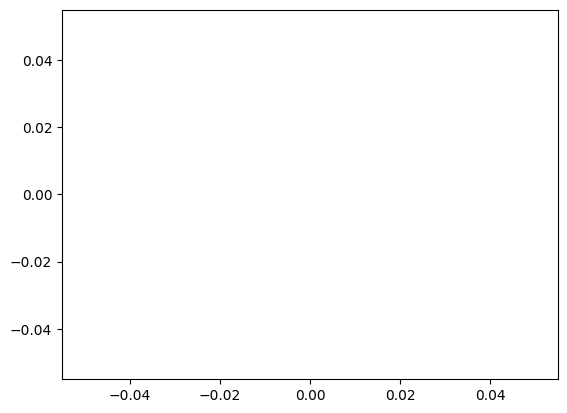

In [ ]:
 plt.plot()


list

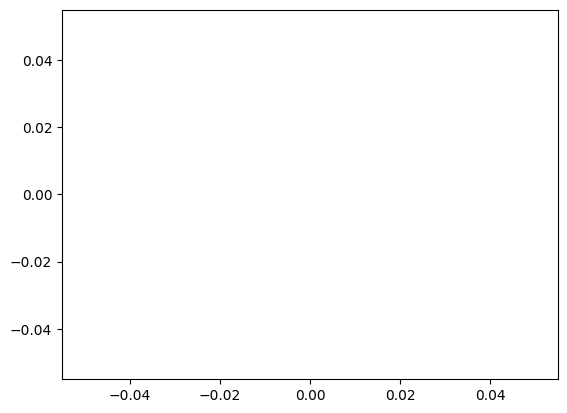

In [ ]:
type(plt.plot())

En este punto, hemos realizado una llamada a `plt.plot()`. Esta llamada está invocando una visualización de datos. Sin embargo, al no tener datos que visualizar el gráfico está vacío.


Pero no es muy útil, ¿verdad? Vamos a generar un gráfico con unos pocos datos:


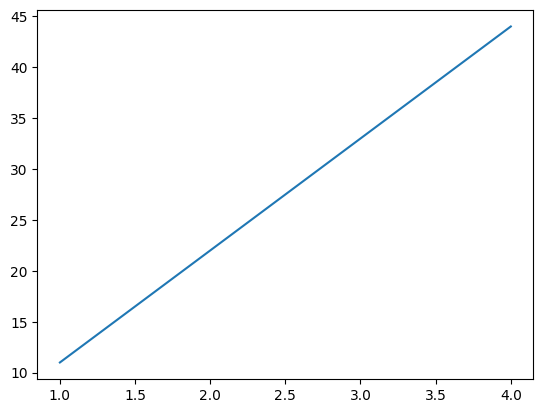

In [ ]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
a = plt.plot(x,y)


Ahora sí hemos realizado una visualización. Hemos generado datos en  x, y y hemos invocado una visualización que, de forma automática, `matplotlib` ha generado. Sin embargo **no sabemos muy bien cómo personalizar o los componentes de este gráfico**


# Figure

`Figure` es el contenedor de más alto nivel en matplotlib: **puedes pensarlo como el marco de un cuadro**.

Contendrá una o varias representaciones de los datos. Estas representaciones se visualizan dentro de `Axes` en forma de gráfico (`plots`). Un `Axes`, generalmente, se entiende también como el área del gráfico, aunque no es propiamente una sección. La sección se definirán dentro de una `Figure` mediante filas y columnas. En alguna documentación se confunde `axes` con `plots`. Para nosotros `plot` será propiamente el gráfico.




Antes de seguir, veamos la estructura que tiene una `figure` en matplotlib.

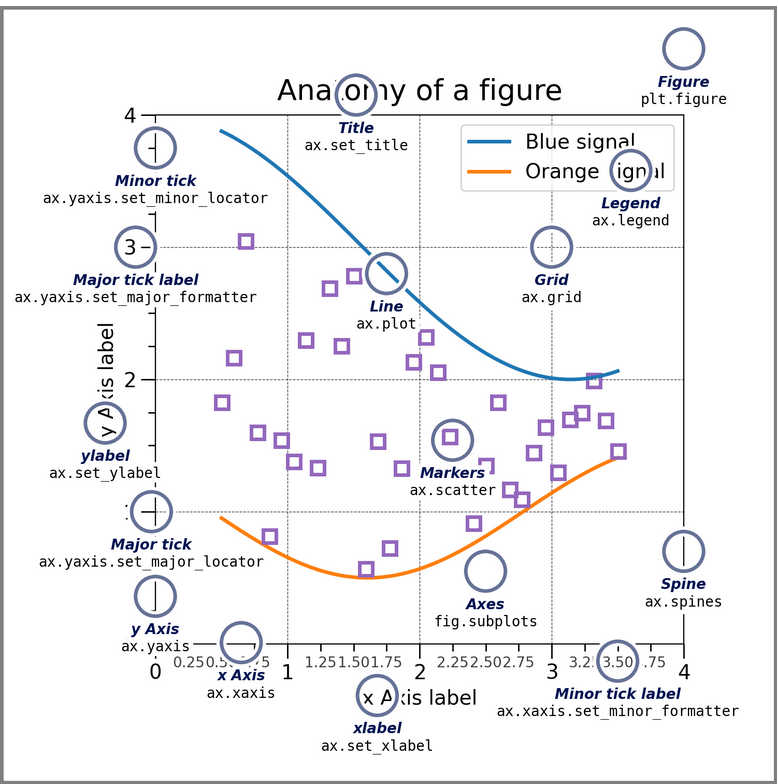

## Ejemplo 1: visualizar un gráfico que esté asociado a una Figure

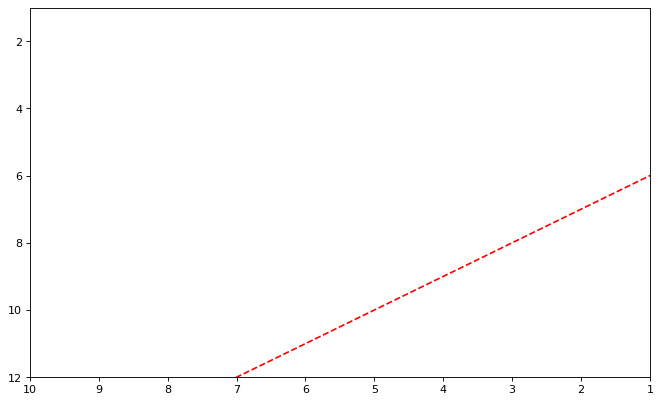

In [ ]:
import numpy as np
fig = plt.figure(figsize=(10,6), dpi=80)
x = np.linspace(0,15,14)
y = np.linspace(5,20,14)
plt.xlim(10)
plt.ylim(12)

plt.plot(x,y,color='red',linestyle='dashed')

# Axes

Con lo poco que hemos hecho, hemos sido capaces de visualizar un gráfico y de vincularlo a una `Figure`. Tal y como lo hemos hecho, es la forma rápida de realizar una visualización. No obstante podemos tener mucho más control sobre el proceso de visualización de los datos.

´Axes´ es, como hemos dicho, un espacio de representación dentro de una `Figure` (como una especie de lienzo). Puedo tener varias ´Axes´ dentro de la figura para representar los gráficos:

### Ejemplo 1: Gráfico simple

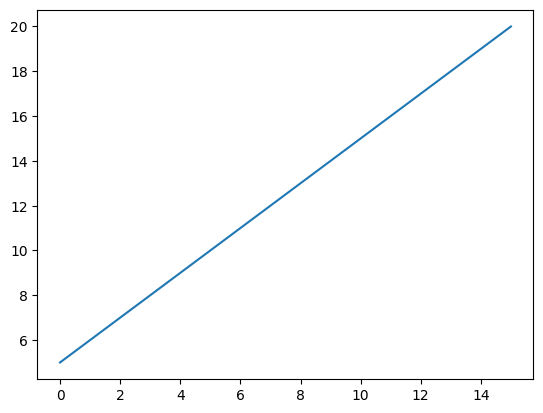

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, y)


In [ ]:
type(fig)

matplotlib.figure.Figure

In [ ]:
type(ax)

matplotlib.axes._axes.Axes

En nuestro ejemplo anterior, `fig` es la figura y, a todos los efectos, `ax`  para nosotros es el contenedor donde puedo invocar la representación del gráfico.

`Axes` permite insertar la visualización en el lugar que nos interese dentro de una `figure`. No obstante, nosotros utilizaremos un `axes` como si fuera un subplot, y lo posicionaremos en un `grid` dentro de nuestra figura.

Como ya se ha adelantado, `ax` está vinculada a `fig`, nuestro contenedor.

## Ejemplo 2: Múltiples gráficos especificando layout

Vamos a ver un ejemplo un poco más complejo. Vamos a crear múltiples subplots para mostrar en la figura y especificamos también el layout (filas y columnas) de la figura y su tamaño

In [ ]:
#cargamos unos pocos datos

import numpy as np

notas_medias = {" Juan": 6,
                     "María ": 8,
                     "Raúl ": 8,
                "Rebeca":9}
x = np.linspace(0, 10, 100)

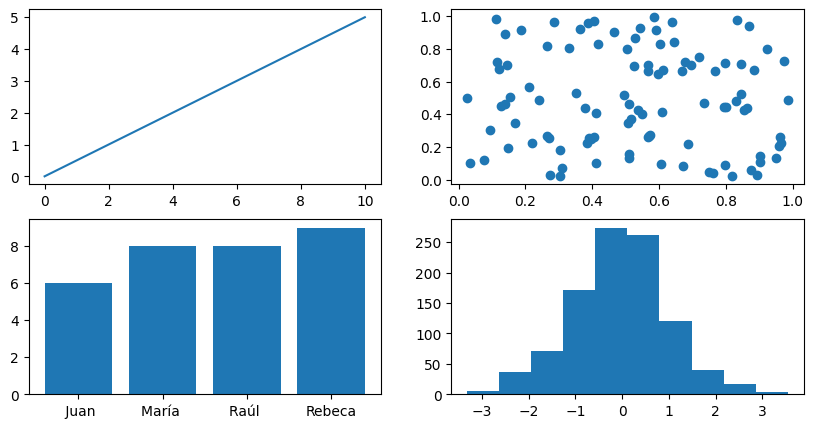

In [ ]:



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(10, 5))


# En cada axis, establecemos el tipo de visualización: line, scatter, bar....
# Ahora lo vemos con más detalle!
ax1.plot(x, x/2);
ax2.scatter(np.random.random(100), np.random.random(100));
ax3.bar(notas_medias.keys(), notas_medias.values());
ax4.hist(np.random.randn(1000));

## Ejemplo 3: Opciones de personalización de un gráfico

Vamos a realizar un gráfico donde se recojan las principales opciones de visualización de un gráfico, según la anatomía de una `Figure` mostrada anteriormente:


In [ ]:
## Vamos a ver qué estilos hay:

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Text(0.5, 0.98, 'Comparativa de notas por grupo')

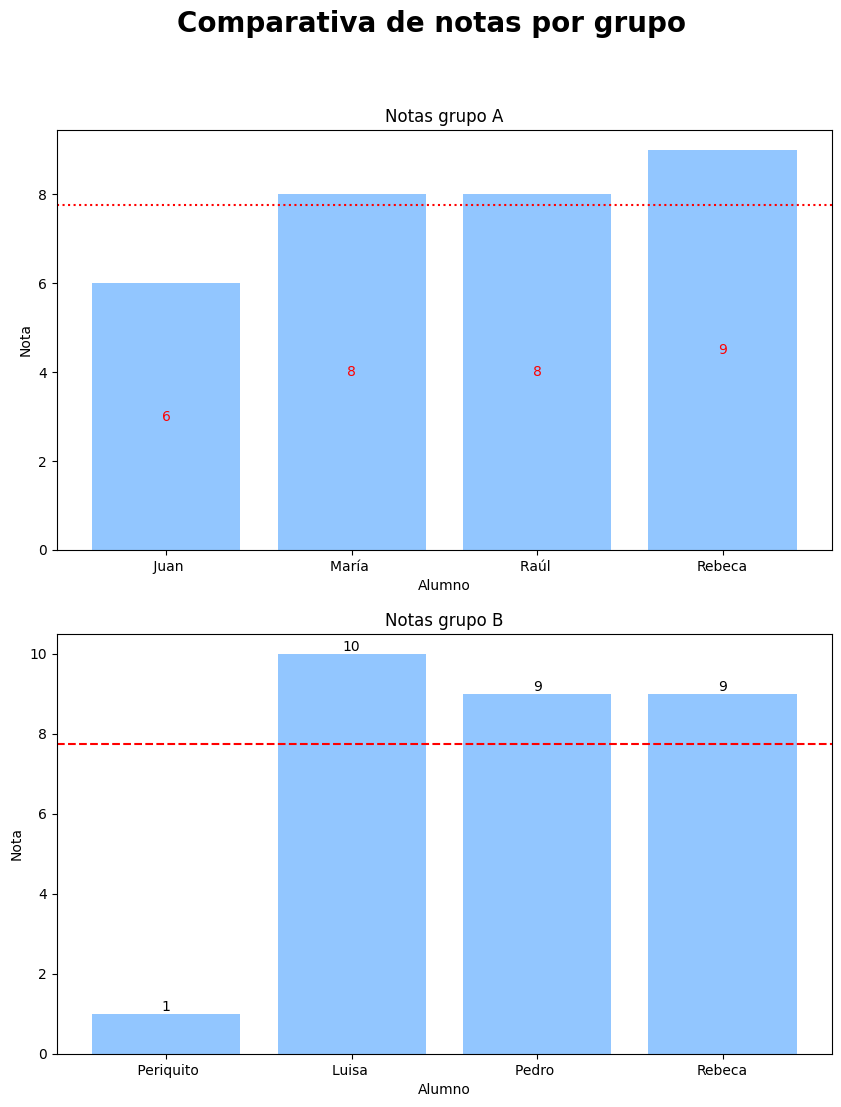

In [ ]:
## establecemos un estio

notas_medias_2 = {" Periquito": 1,
                     "Luisa ": 10,
                     "Pedro ": 9,
                "Rebeca":9}
## seleccionar el estilo
plt.style.use('seaborn-v0_8-pastel')
fig, ((ax1), (ax2)) = plt.subplots(nrows=2,
                                             ncols=1,
                                             figsize=(10, 12))


# En cada axis, establecemos el tipo de visualización: line, scatter, bar....
# Ahora lo vemos con más detalle!

bar_container1 = ax1.bar(notas_medias.keys(), notas_medias.values());
bar_container2 = ax2.bar(notas_medias_2.keys(), notas_medias_2.values());

# Personalizamos ejes

ax1.set(title='Notas grupo A', xlabel='Alumno',ylabel='Nota')
ax2.set(title='Notas grupo B', xlabel='Alumno',ylabel='Nota')

## Añadimos y / o el estilo de las etiquetas dentro del gráfico:
ax1.bar_label(bar_container1, label_type='center', color="red")
ax2.bar_label(bar_container2)

## Vamos a añadir una línea que marque la nota media en ax1

ax1.axhline(y=np.mean(np.array(list(notas_medias.values()))), color = 'r', linestyle=':')
ax2.axhline(y=np.mean(np.array(list(notas_medias.values()))), color = 'r', linestyle='--')

# Añadimos el título de la figura

fig.suptitle('Comparativa de notas por grupo', fontsize = 20, fontweight='bold')

# Resumen del flujo de trabajo en Matplotlib



1.   Crear la figura / plots

2.   Visualizar los datos

3.   Personalizar la visualización

4.   Guardar o compartir la visualización



# Algunos ejemplos útiles para la personalización de gráficos en matplotlib:

## Modificar estilo de líneas



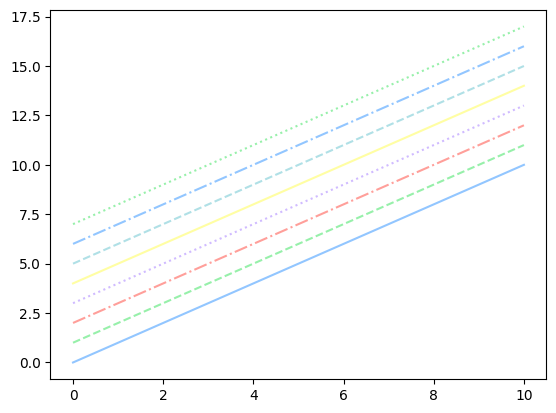

In [ ]:
import numpy as np
x = np.linspace(0, 10, 1000)

plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # linea
plt.plot(x, x + 5, linestyle='--') # linea discontinua
plt.plot(x, x + 6, linestyle='-.') # linea discontinua y .
plt.plot(x, x + 7, linestyle=':');  # linea punteada

### Establecer límites en los ejes x e y


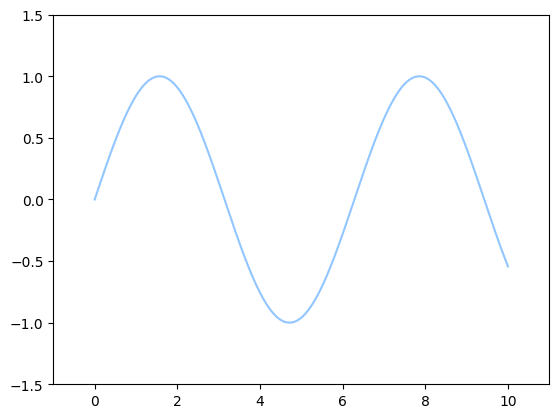

In [ ]:

plt.plot(x,np.sin(x))
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

## Traducción de métodos plt -> ax

Aunque muchas de las funciones de `plt` se traducen directamente a los métodos de `ax` ( plt.plot() → ax.plot(), plt.legend() → ax.legend(), etc), no es así para todos los métodos, sobretodo en las funciones que establecen límites, etiquetas o títulos:

    plt.xlabel() → ax.set_xlabel()

    plt.ylabel() → ax.set_ylabel()

    plt.xlim() → ax.set_xlim()

    plt.ylim() → ax.set_ylim()

    plt.title() → ax.set_title()


# Pandas

Ahora que ya hemos visto lo que nos puede ofrecer `matplotlib`, merece la pena echar de nuevo un ojo a `pandas`.

Un dataframe va a tener el método `plot`  que devuelve un `Axes`. Por tanto, los métodos y la personalización de los gráficos que podemos hacer con `matplotlib` los podemos hacer con pandas.

Esto nos facilita hacer una exploración rápida de los datos sobre el mismo dataset cuando estamos trabajando. No obstante, según el contexto, será necesario adaptar estas visualizaciones.

Para realizar las visualizaciones adecuadas, es importante controlar la información que queremos visualizar del `dataframe` antes de invocar la visualización.

matplotlib.axes._axes.Axes

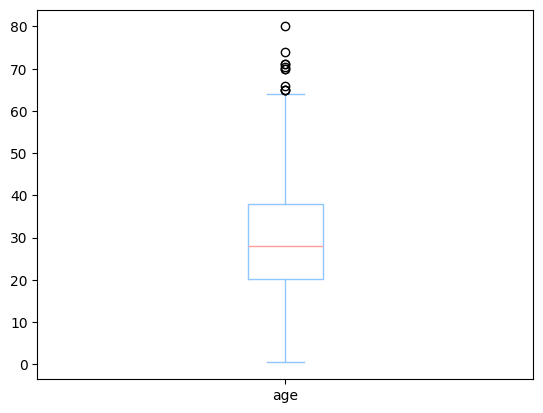

In [ ]:
g = titanic['age'].plot(kind='box')
type(g)

<Axes: xlabel='age', ylabel='fare'>

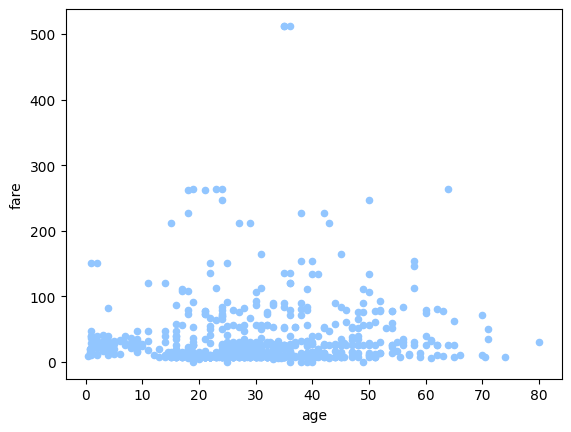

In [ ]:
titanic.plot.scatter(x='age',y='fare')

# Seaborn

Hasta ahora, hemos visto los elementos básicos para hacer visualizaciones con `matplotlib`. Esta librería sigue siendo uno de los referentes en `python` para realizar visualizaciones con los datos. Sin embargo, el estilo de esta librería se está quedando atrás y existen otras librerías más modernas que facilitan la creación de gráficos con una visualización más moderna y menos líneas de código.

Nosotros vamos a ver `seaborn`, que se basa en `matplotlib` y ofrece un API más asequible para manejar conjuntos de datos, generalmente *multivariantes*.

El siguiente ejemplo ilustra lo sencillo que es realizar una visualización compleja con ´seaborn´

In [ ]:
import seaborn as sns
import plotly.express as px # meter dataset
import pandas as pd

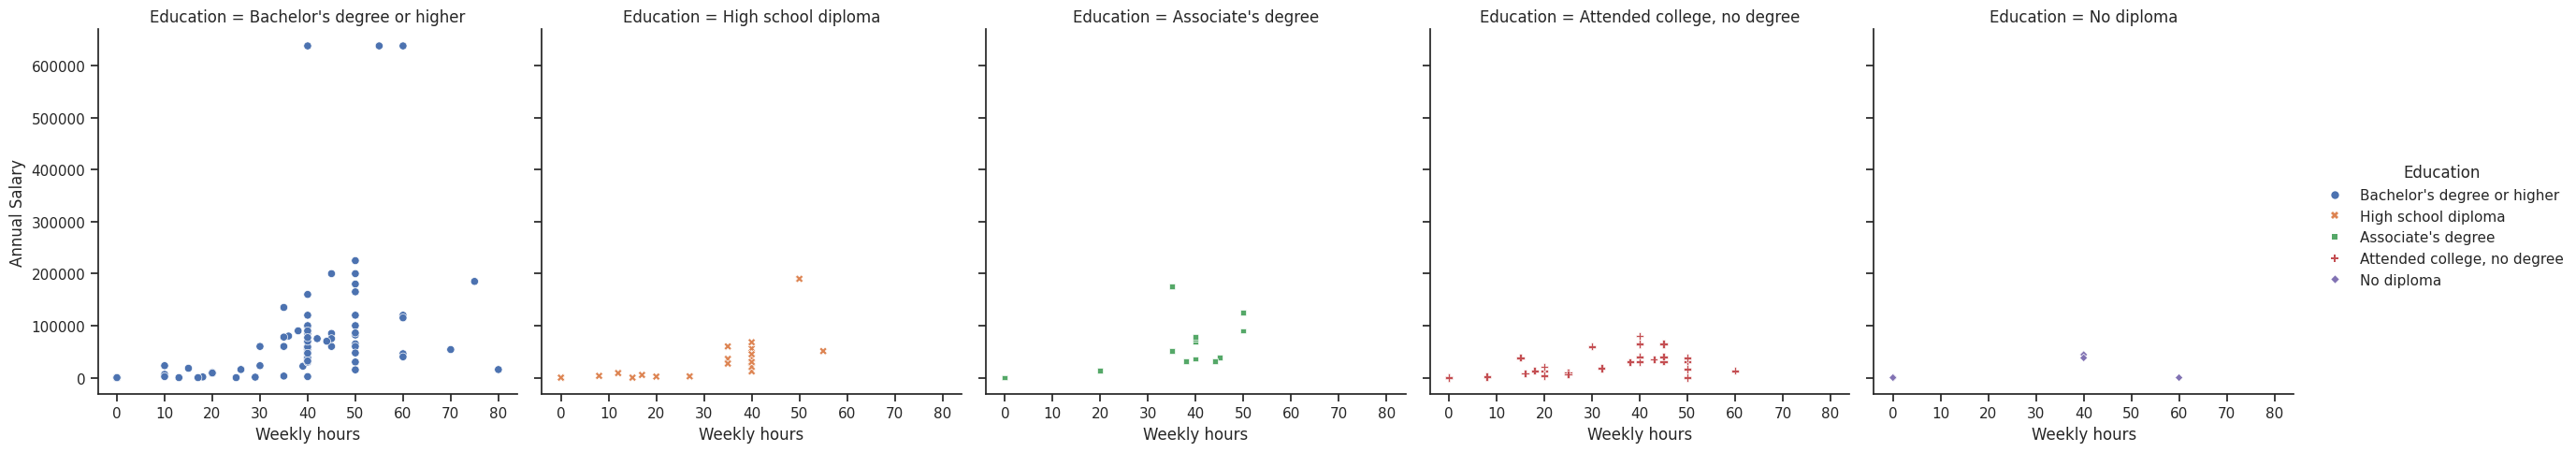

In [ ]:

sns.set(style="ticks")


sns.relplot(x="Weekly hours", y="Annual Salary", hue="Education", \

            style="Education", col = 'Education', data=dataset)


En realidad, `seaborn` no sustituye a  `matplotlib`, sino que se basa en esta librería, pero simplifica y mejora la generación de visualizaciones. Seaborn tiene sus propias rutinas, pero puede sobreescribor los parámetros por defecto y producir salidas mucho más vistosas.

A modo de ejemplo, podemos comprar los estilos que generan `matplotlib vs seaborn`.


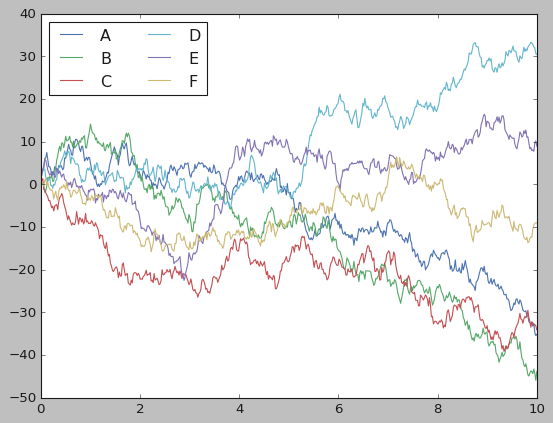

In [ ]:
# Visualización
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

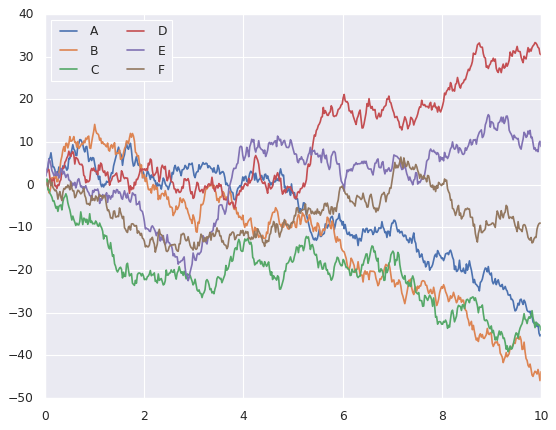

In [ ]:
## visualización con seaborn

sns.set()
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left');


[Aquí tenéis un breve resumen de lo que ofrece seaborn](https://www.theoj.org/joss-papers/joss.03021/10.21105.joss.03021.pdf)

En los siguientes ejemplos, vamos a ver las principales características y gráficos que podemos usar con esta librería, y a través de los ejemplos veréis lo fácil que es realizar visualizaciones vistosas y potentes.

## Control de la estética

`seaborn` permite controla los temas de las visualizaciones tal y como hacía `matplotlib`. Asimismo, podemos usar las llamadas de esta librería para personalizar los ejes y las etiquetas:


### Temas

Proporcionan un estilo general del gráfico:

<Axes: xlabel='Annual Salary', ylabel='Count'>

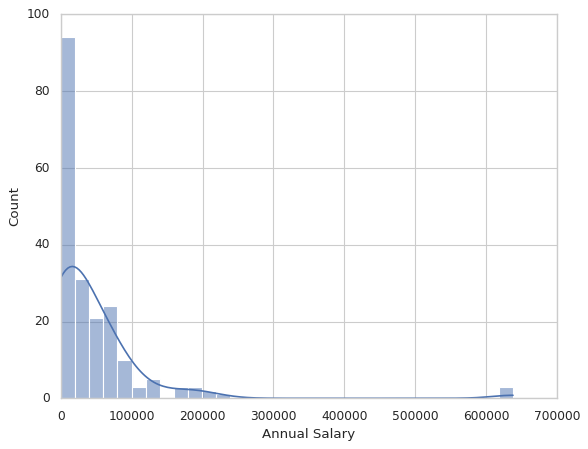

In [ ]:
sns.set_style('whitegrid')
sns.histplot(dataset['Annual Salary'],kde=True)

### Personalización de gráficos como si fueran plots
Los plots o gráficos de `seaborn` son de tipo `Axes`. Por tanto, podemos bajar de nivel y personalizarlo como si estuviéramos manejando este componente de `matplotlib`. No obstante, también podemos vincular el `Axes` del gráfico de `seaborn` al `Axes` que me devuelve la llamada plt.subplots(). Cualquiera de las dos aproximaciones facilita la personalización de los gráficos. Veamos un apr de ejemplos:

#### Ejemplo 1: llamada a métodos de `axes`

matplotlib.axes._axes.Axes

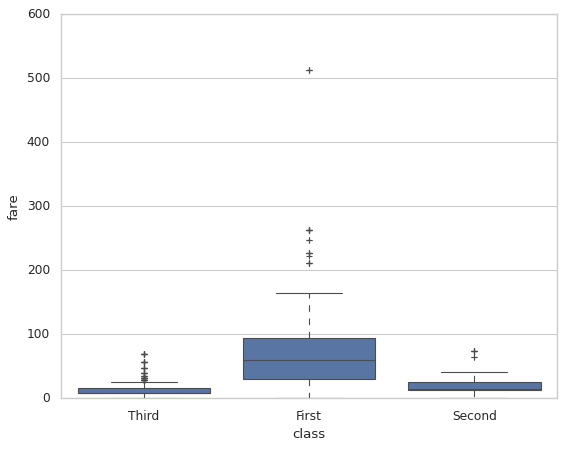

In [ ]:
g = sns.boxplot(titanic, x='class',y='fare')
type(g)

In [ ]:
g.set_xlabel('clase')
g.set_ylabel('Tarifa')

Text(21.0, 0.5, 'Tarifa')

#### Ejemplo 2: Generación de un gráfico `seaborn` en una figura de `matplotlib`

In [ ]:
array1=["layer", "dodge", "stack", "fill"]
array2=['A']
for a1, a2 in zip(array1,array2):
  print (a1+ '--' + a2)



layer--A


In [ ]:
for a1, a2 in zip(array1,array2):
  print (a1+ '--' + a2)



layer--A


layer--Axes(0.125,0.1;0.168478x0.8)
dodge--Axes(0.327174,0.1;0.168478x0.8)
stack--Axes(0.529348,0.1;0.168478x0.8)
fill--Axes(0.731522,0.1;0.168478x0.8)


Text(0.5, 0.98, 'Comparativa de salario por educación')

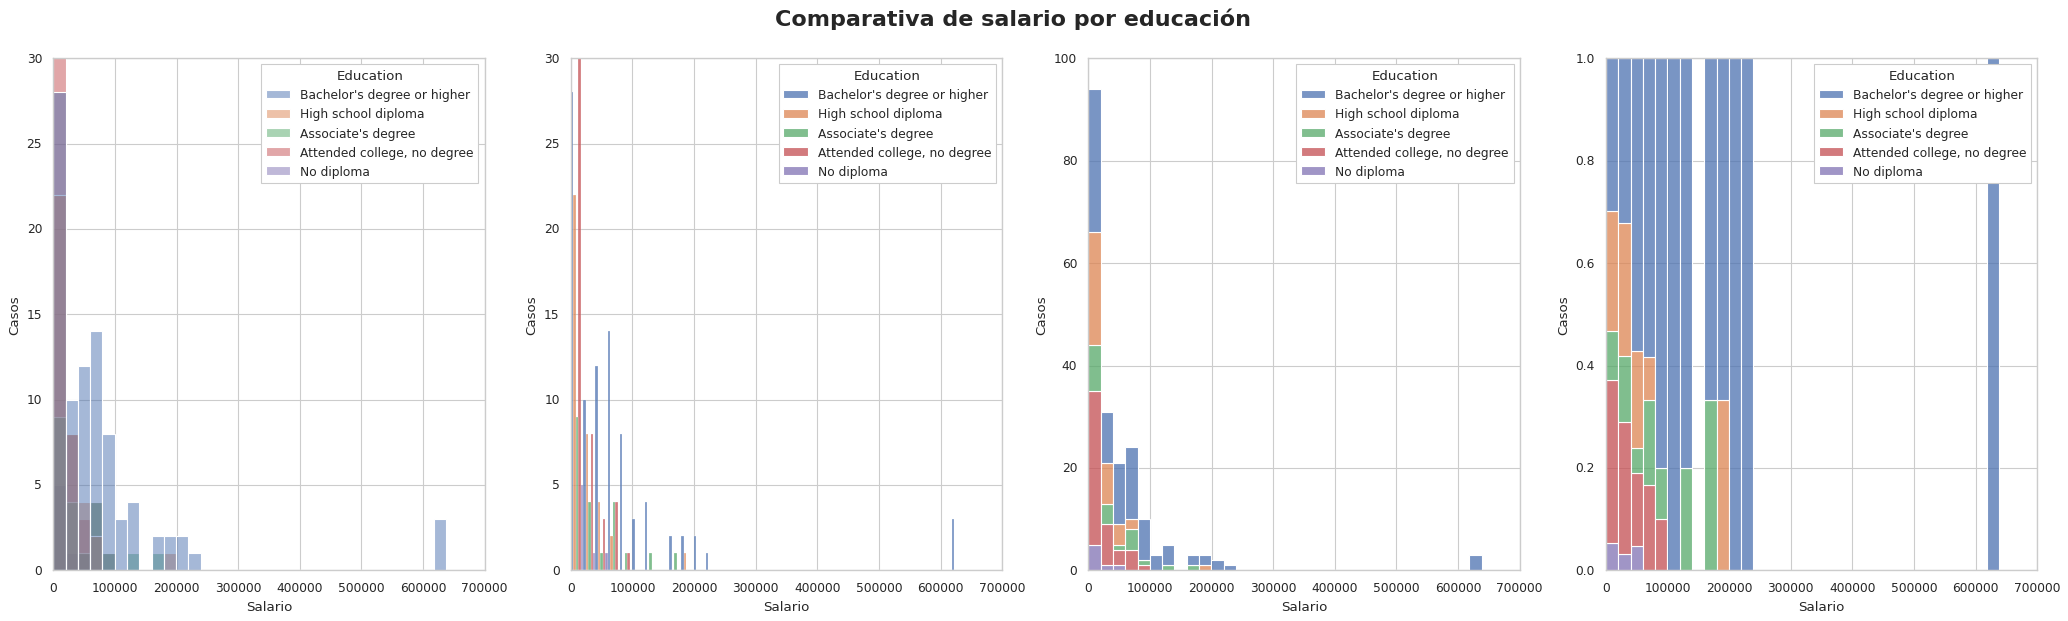

In [ ]:
methods = "layer", "dodge", "stack", "fill"
ncol = len(methods)
f, axs = plt.subplots(1, ncol, figsize=(8 * ncol, 8))
for method, ax in zip(methods, axs):
    print (method + '--' + str(ax))
    sns.histplot(dataset, x="Annual Salary", hue="Education", multiple=method, ax=ax)
    ax.set_xlabel('Salario')
    ax.set_ylabel('Casos')

f.suptitle('Comparativa de salario por educación', fontsize = 20, fontweight='bold')

## Paleta de colores
También podemos especificar la paleta de colores que utilizar:
[En la documentación oficial](https://seaborn.pydata.org/tutorial/color_palettes.html) se puede comprobar todas las opciones de personalización que ofrece. Vamos a ver un ejemplo: queremos el mismo gráfico (histograma y densidad), pero atendiendo a los diferentes grados educativos:

Text(0, 0.5, 'Casos')

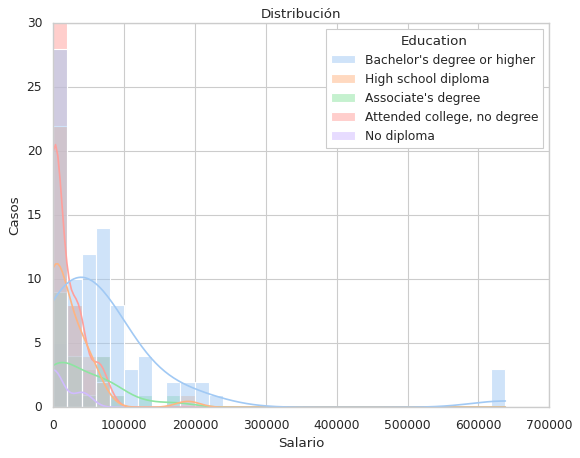

In [ ]:
plot = sns.histplot(dataset, x = 'Annual Salary',kde=True,hue='Education', palette='pastel')
plot.set_title('Distribución')
plot.set_xlabel('Salario')
plot.set_ylabel('Casos')


## Visualizaciones

Vamos a ver algunas de las visualizaciones que tiene esta librería, pero en vez de analizar todos y cada uno de los gráficos, nos vamos a centrar en casos de uso que podríamos necesitar en el contexto de analistas o científicos de datos.

Recordad que esta librería está orientada a la visualización de varios datos.

Para estos ejemplos, vamos a cargar diferentes `datasets` con los que estamos más familiarizados.




In [ ]:
titanic = titanic[['survived','age','sex','fare','adult_male','alone','class']]
titanic.head(2)

,survived,age,sex,fare,adult_male,alone,class
0,0,22.0,male,7.2500,True,False,Third
1,1,38.0,female,71.2833,False,False,First


In [ ]:
titanic.fare = titanic.fare.astype(float)


## Caso 1. Nos interesa analizar la distribución de algunas variables de los datos




En `seaborn` existen varios gráficos para mostrar distribuciones de los datos.

Si estamos analizando variables categóricas, se puede utilizar, por ejemplo:

1. boxplot
2. violinplot
3. boxenplot
4. countplot
5. Estimación de datos: barplot

etc.

En caso de no ser variables categóricas se pueden usar:
1. distplot
2. histplot

Vamos a analizar algunos de estos gráficos, aunque existen otros.

En el caso de las variables categóricas, realizaremos la llamada específica a cada uno de esos tipos de gráficos, por ejemplo: `sns.boxplot()`. No obstante, existe también la posibilidad de llamar a `sns.catplot()` y especificar el tipo (`kind='box')`. Haremos un ejemplo con el gráfico 'boxen'.


#### BoxPlots

Proporcionan una visión de la **distribución de los datos a partir de sus cuartiles**, lo que facilita, además, un primer análisis sobre la presencia de datos **atípicos** en nuestro dataset. Nos da información, por tanto, sobre dispersión y asimetría de los datos.


<Axes: xlabel='sex', ylabel='age'>

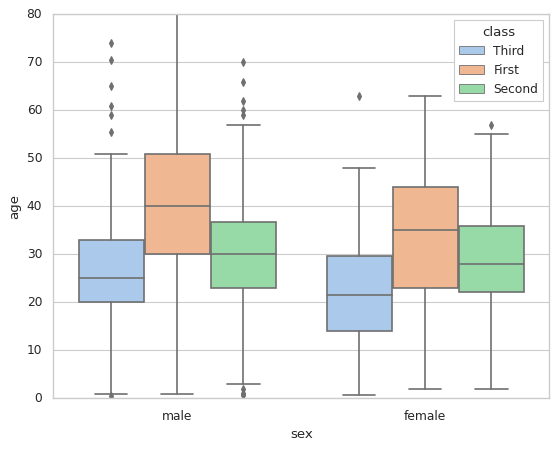

In [ ]:
##1. boxplot: media cuartil y outliers
##2. distribución
##3. kde
sns.boxplot(titanic,x='sex',y='age',hue='class',palette='pastel')

### Un tipo especial de BoxPlot:
En `seaborn` existe un tipo especial de `boxplot` que puede facilitar más información sobre la distribución de los datos_

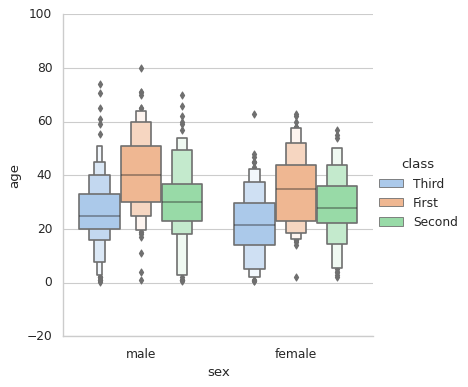

In [ ]:
sns.catplot(
    data=titanic,
    x='sex',y='age',hue='class', kind="boxen",palette='pastel'
)

### Violin

Es una combinación de un 'boxplot` con la distribución kernel.

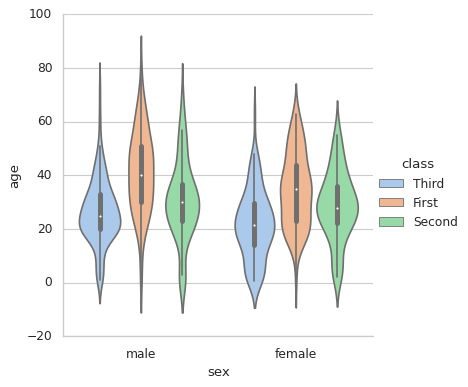

In [ ]:
sns.catplot(
    data=titanic,
    x='sex',y='age',hue='class', kind="violin",palette='pastel'
)


### Barplot:

En general, un gráfico de barras da información sobre **conteos o frecuencias** de una variable (`countplot` en `seaborn`).

En el caso de `seaborn`, un gráfico de barras representa una **estimación de la tendencia central** de una variable numérica con la altura de cada rectángulo y proporciona alguna indicación de la incertidumbre en torno a esa estimación utilizando barras de error. El estimador por defecto es la media.

Si lo que se pretende es mostrar la distribución de valores para una variable categórica un boxplot es más adecuado.


<Axes: xlabel='class', ylabel='age'>

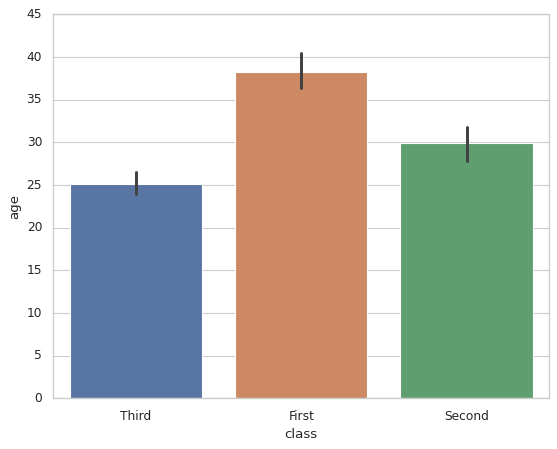

In [ ]:
sns.barplot(titanic, x='class',y='age',estimator='mean')

In [ ]:
titanic.groupby('class').aggregate({'age':'mean'})

,age
class,
First,38.233441
Second,29.877630
Third,25.140620


Como lo que visualiza es una estimación, tiene asociado un error que, también, puede ser visualizado.

Para ello utilizaríamos el parámetro errobar. La documentación asociada se encuentra en el siguiente [enlace](https://seaborn.pydata.org/tutorial/error_bars.html)

<Axes: xlabel='class', ylabel='age'>

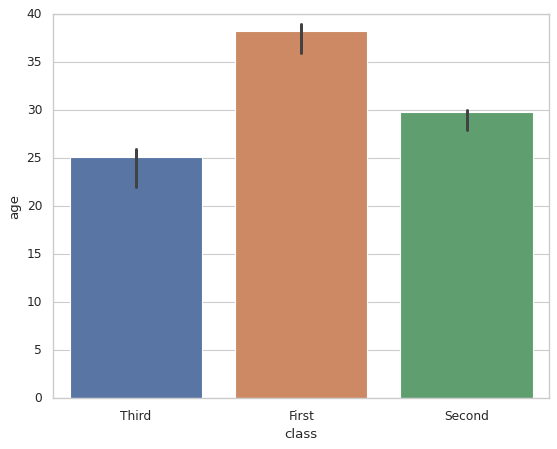

In [ ]:
sns.barplot(titanic, x='class',y='age',estimator='mean',errorbar=('pi',10))

### Countplot

Similar a un histograma, pero orientado a variables categóricas. Puede mostrar gráficos uni o multivariantes. Su sintaxis es similar a la de `barplot`

https://seaborn.pydata.org/generated/seaborn.barplot.html

https://seaborn.pydata.org/tutorial/distributions.html
https://github.com/mwaskom/seaborn/blob/master/examples/joint_kde.py
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

<Axes: xlabel='class', ylabel='count'>

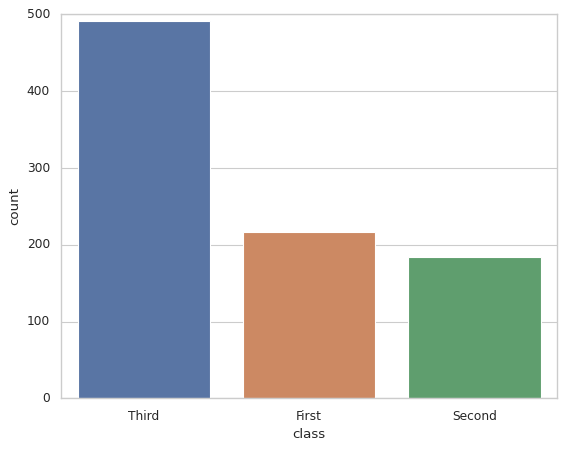

In [ ]:
sns.countplot(titanic, x='class')

In [ ]:
titanic.groupby('class')['survived'].count()

class
First     216
Second    184
Third     491
Name: survived, dtype: int64

<Axes: xlabel='class', ylabel='count'>

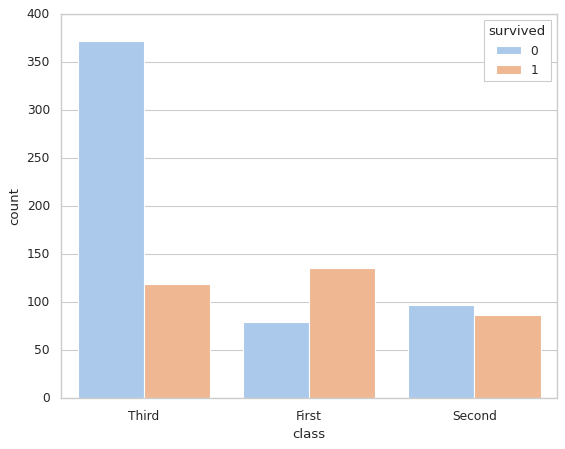

In [ ]:
sns.countplot(titanic, x='class', hue='survived',palette='pastel')

### Histogramas y gráficos de barras

Visualizan **cómo se distribuye una variable continua**, esto es, nos proporciona información sobre el **número de casos cubiertos por esa variable, si está sesgada o no, si existen outliers, etc**.

En general, un histograma tiene como objetivo **aproximar la función de densidad de probabilidad subyacente que generó los datos, agrupando los datos en intervalos y contando observaciones**. La estimación de densidad Kernel (KDE) presenta una solución diferente al mismo problema. En lugar de utilizar intervalos discretos, un gráfico KDE suaviza las observaciones con una estimación de densidad contínua.

<ipython-input-58-9fe2fd878c4b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic.fare,kde=False,hist=True)


<Axes: xlabel='fare'>

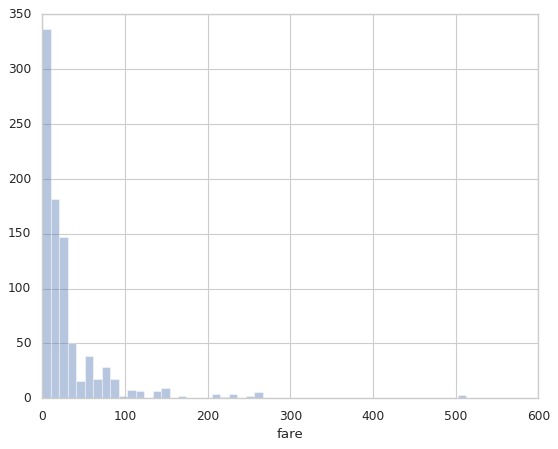

In [ ]:
sns.distplot(titanic.fare,kde=False,hist=True)

<ipython-input-59-5e85bd3d3fa8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic.fare)


<Axes: xlabel='fare', ylabel='Density'>

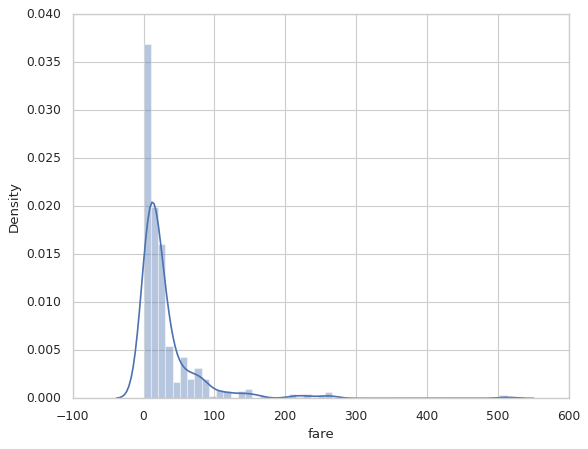

In [ ]:
sns.distplot(titanic.fare)

<ipython-input-60-fa624d1093a2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic.fare,hist=False)


<Axes: xlabel='fare', ylabel='Density'>

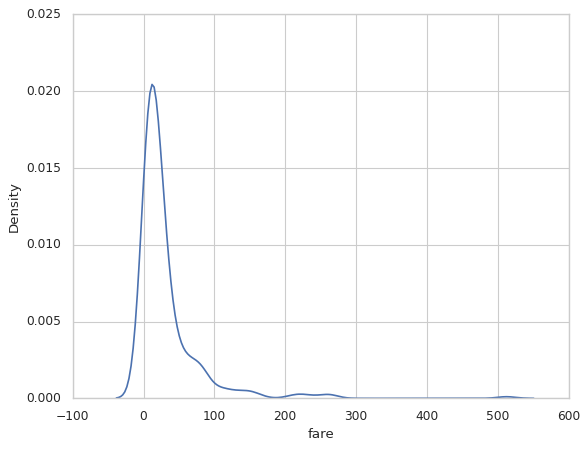

In [ ]:
sns.distplot(titanic.fare,hist=False)

### Histplot

Similar a distplot, representa distribuciones de los datos. Puede mostrar gráficos uni o multivariantes. Su sintaxis es similar a la de `barplot`

<Axes: xlabel='class', ylabel='Count'>

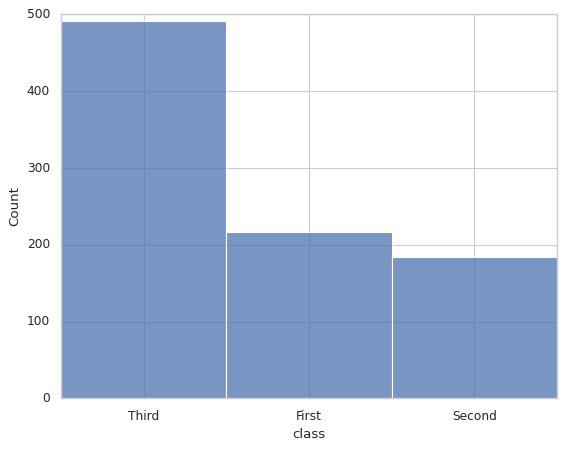

In [ ]:
sns.histplot(titanic, x='class')

<Axes: xlabel='fare', ylabel='Count'>

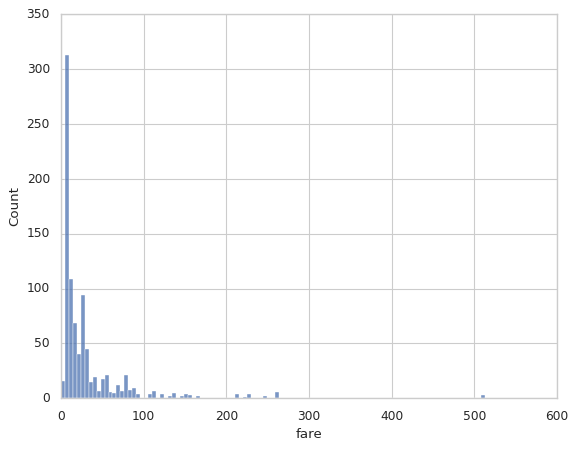

In [ ]:
sns.histplot(titanic, x='fare')



## Caso 2: Nos interesa explorar la relación entre dos variables continuas

En este punto, nos interesa conocer el comportamiento conjunto de dos variables, normalmente numéricas.





### Scatterplot

Muestra la **relación entre dos variables, x e y, como puntos en un plano**. Se puede agrupar por categorías (`hue`) y utilizar un tamaño de punto para mostrar su importancia respecto a otra variable (`size`).


Para este caso, utilizaremos el dataset `iris`


<Axes: xlabel='petal_length', ylabel='petal_width'>

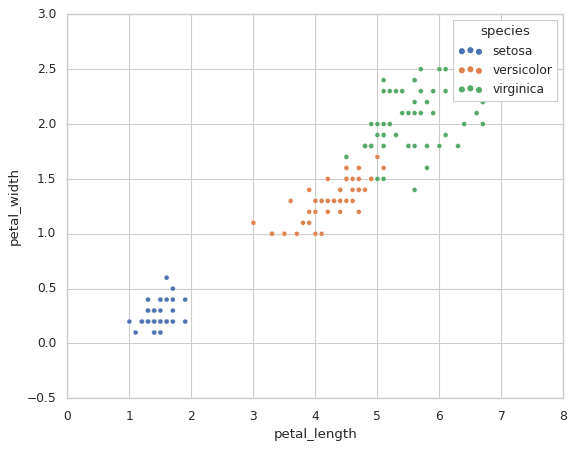

In [ ]:
sns.scatterplot(iris, x='petal_length',y='petal_width',hue='species')

Supongamos que queremos analizar la misma relación, pero atendiendo al ratio que relaciona la longitud del pétalo y sépalo

<Axes: xlabel='petal_length', ylabel='petal_width'>

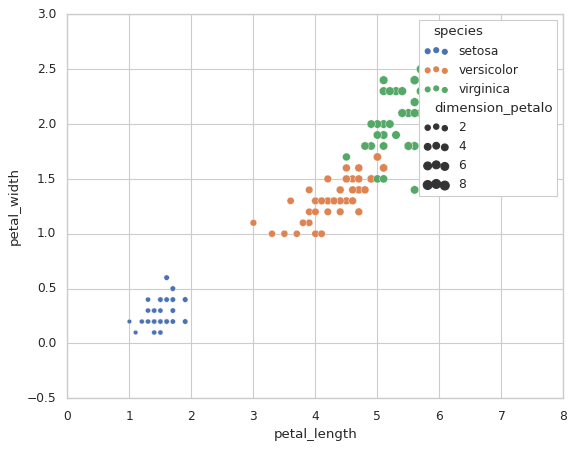

In [ ]:
sns.scatterplot(iris, x='petal_length',y='petal_width',hue='species',size='dimension_petalo')

### Relplot

Muchas veces necesitamos entender la relación entre dos variables, agrupadas o no, **pero queremos entender el efecto aislado en esta relación que produce otra variable (normalmente, categorica)**. En este caso, utilizaremos `relplot` con el parámetro `col` o `row`

Para este ejemplo, volveremos a usar el dataset `titanic`

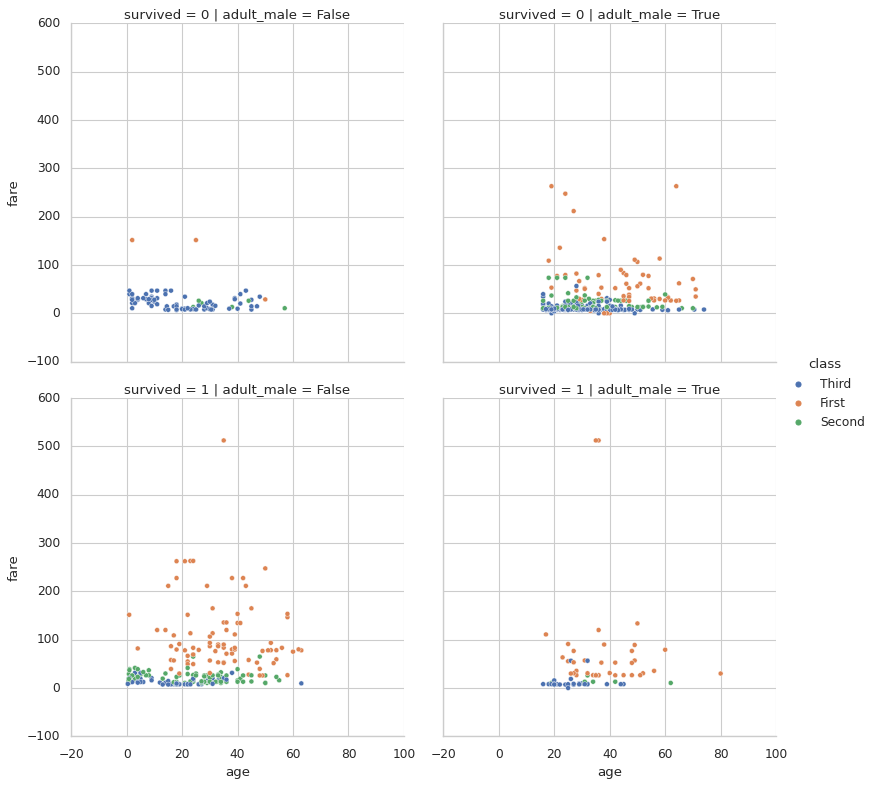

In [ ]:
sns.relplot(titanic, x='age',y='fare',hue='class',col='adult_male', row='survived')

### Regresión

Puede ser útil realizar un modelo de regresión sobre los datos visualizados anteriormente. En ese caso, utilizaremos `regplot` o `lmplot`. La diferencia entre los dos es que el primero es a nivel de `axes`y el segundo a nivel de  `figure`



<Axes: xlabel='petal_length', ylabel='sepal_length'>

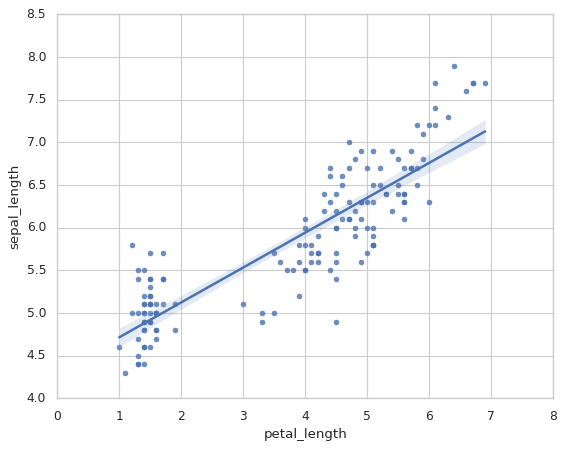

In [ ]:
sns.regplot(iris, y='sepal_length', x='petal_length')

### Gráfico de correlación

En muchos escenarios es importante estudiar la correlación entre dos variables. Para ello, utilizaremos un gráfico de tipo `heatmap` sobre la matriz de correlación calculada en el dataframe:

In [ ]:
correlacion = iris.corr()

<ipython-input-65-6fb65e9ad313>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = iris.corr()


<Axes: >

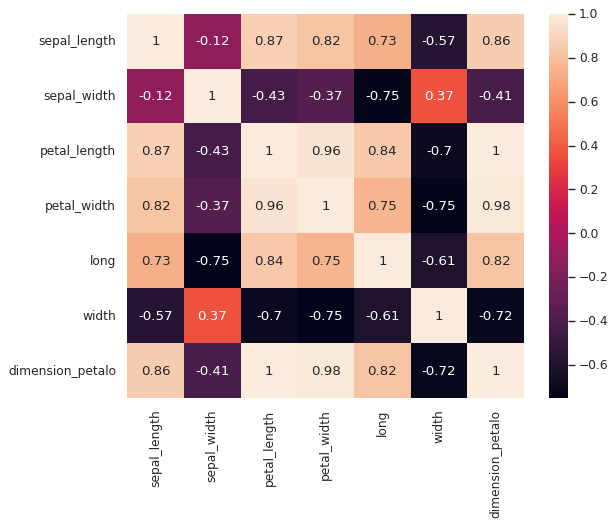

In [ ]:
sns.heatmap(correlacion,annot=True)

## Jointplot

Nos muestra la relación entre dos variables continuas y sus respectivas distribuciones

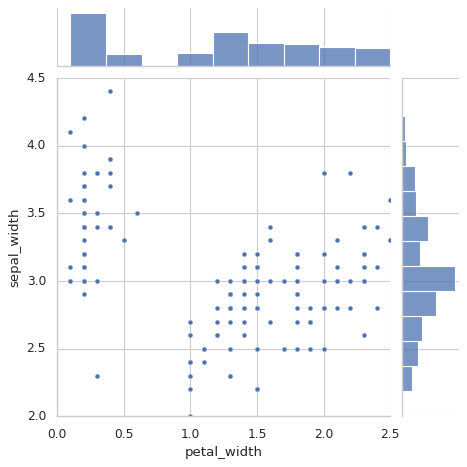

In [ ]:
sns.jointplot(x="petal_width", y="sepal_width", data=iris)


## FacetGrid
Hemos visto en el ejemplo de `replot` que era posible estudiar la relación entre dos variables, agrupando por una tercera, y aislando esta relación de acuerdo al valor que tomaban otras dos variables y dividiendo el análisis por filas y columnas. De este modo obtuvimos un gráfico dividido por filas y columnas con diferentes scatterplots. Esto es un ejemplo de visualización en Grid.

FacetGrid nos permite hacer lo mismo. De hecho, `relplot(), displot(), catplot(), y lmplot()` utilizan internamente este objeto para mostrar sus visualizaciones.

Vamos a hacer un ejemplo de visualización usando este objeto:

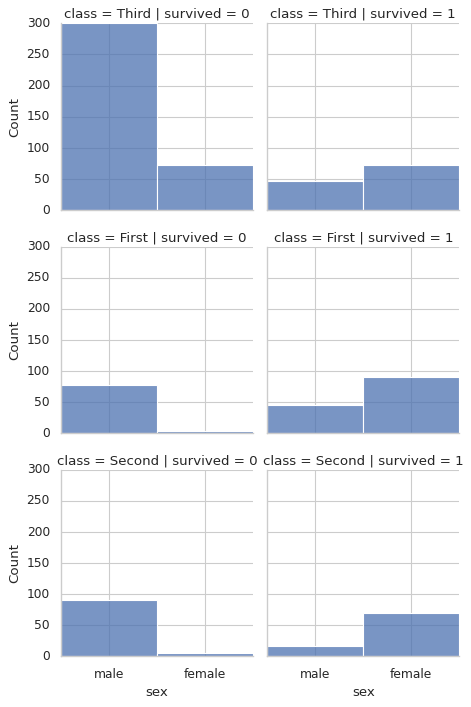

In [ ]:
g = sns.FacetGrid(titanic, col="survived",  row = 'class')
g.map(sns.histplot, 'sex')


## Pairgrid

Puede ser útil echar un primer vistazo a las relaciones existentes entre todas las variables. Para este fin, `seaborn` cuenta con `PairGrid`



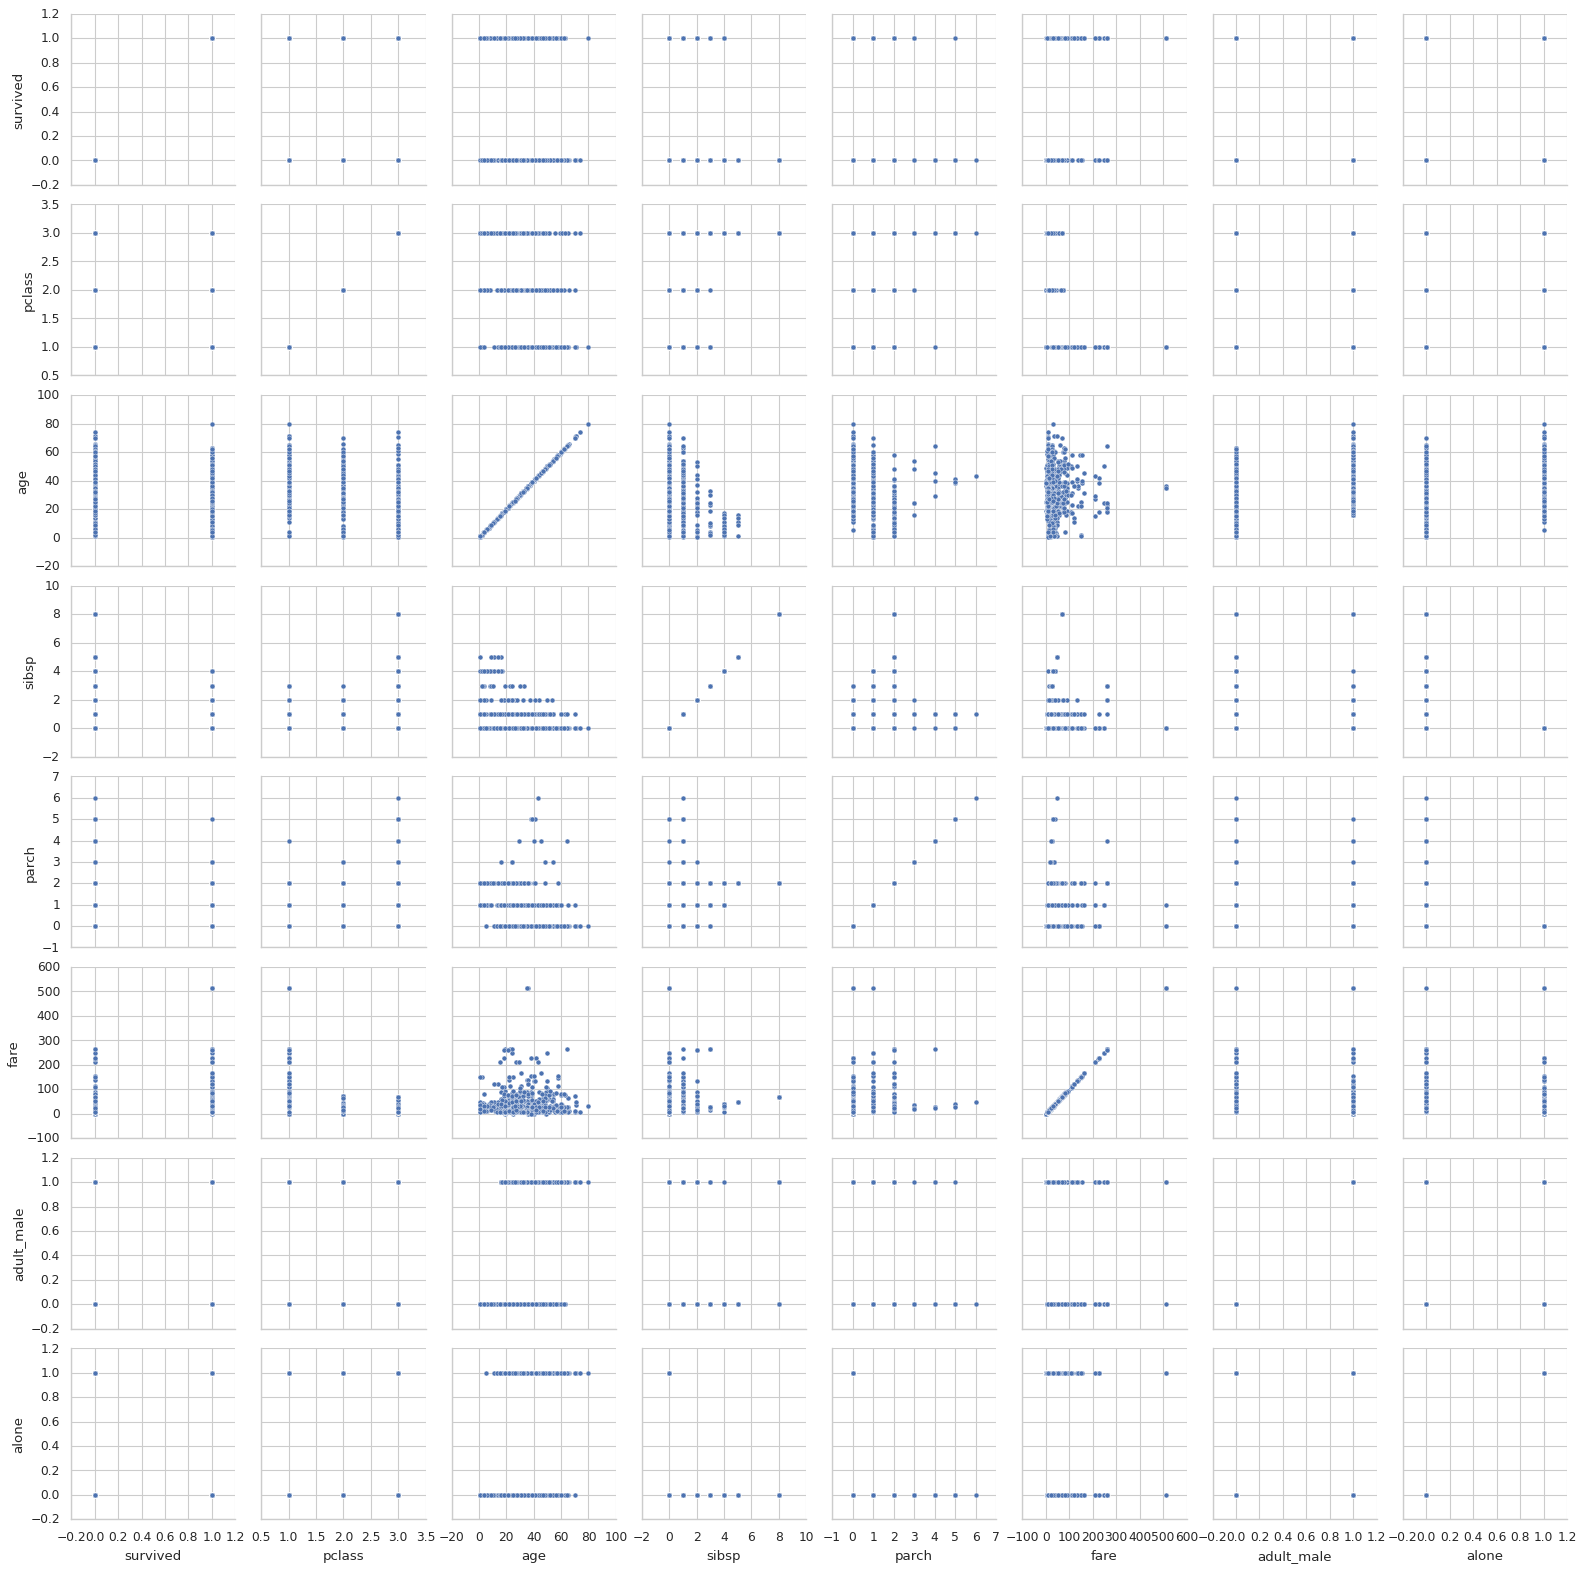

In [ ]:
g = sns.PairGrid(titanic)
g.map(sns.scatterplot)

## Pairplot

Una forma más directa de hacer las visualizaciones de relaciones entre cada pareja de variables es utilizando `pairplot`:

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


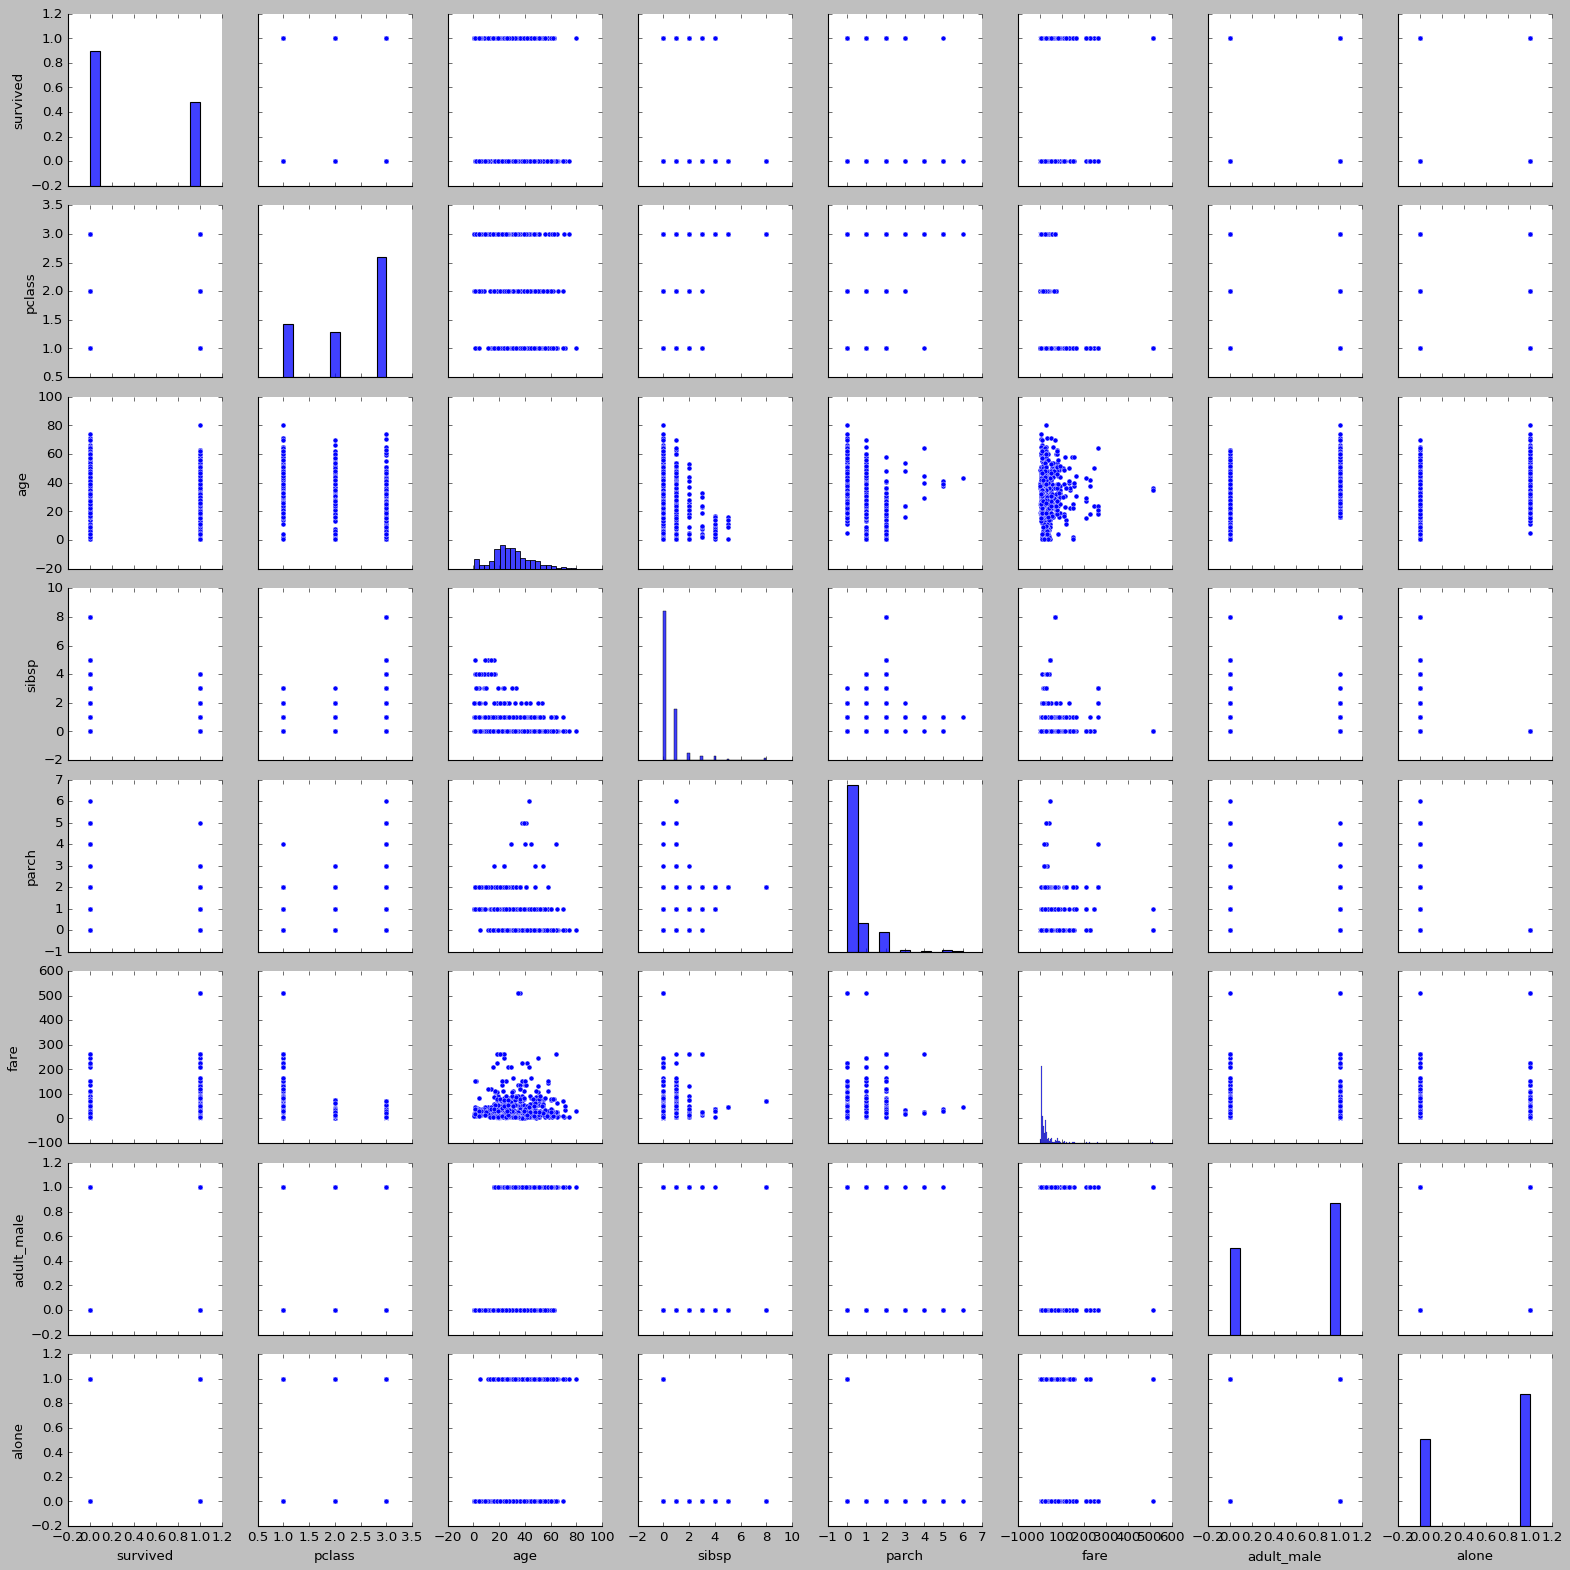

In [ ]:
sns.pairplot(titanic)


# Bonus: visualizaciones interactivas con plotly

Visualizaciones interactivas con `pandas` y `plotly`
[Plotly](https://plotly.com/python/) es un framework para realizar visualizaciones interactivas en Python.

No es común utilizarlo en un `notebook` con `pandas`, pero existe un modo de realizarlo:



In [ ]:
pd.options.plotting.backend='plotly'

In [ ]:
iris.plot(kind='scatter',x='sepal_length',y='sepal_width',color='species',size='petal_width')

# Ejercicio

In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [ ]:
titanic.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [ ]:
## seaborn
## histograma -> countplot
## por cada ciudad, conteo

## pandas y groupby -> Southhampton 10, Cherbourg 8...

In [ ]:
#titanic = titanic.fillna('Unk')

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    object 
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         891 non-null    object 
 12  embark_town  891 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(1), int64(4), object(8)
memory usage: 92.4+ KB


In [ ]:
df1 = titanic.groupby('embark_town').sum()
df1

<ipython-input-91-a6f6b720e27d>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,survived,pclass,age,sibsp,parch,fare,adult_male,alone
embark_town,,,,,,,,
Cherbourg,93,317,4005.92,65,61,10072.2962,90,85
Queenstown,30,224,786.50,33,13,1022.2543,37,57
Southampton,217,1514,16312.75,368,266,17439.3988,410,393


In [ ]:
 titanic.groupby('embark_town').count()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
embark_town,,,,,,,,,,,,,,
Cherbourg,168,168,168,130,168,168,168,168,168,168,168,69,168,168
Queenstown,77,77,77,28,77,77,77,77,77,77,77,4,77,77
Southampton,644,644,644,554,644,644,644,644,644,644,644,128,644,644


In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df1 = titanic.groupby('embark_town').aggregate({'embark_town':'count'})
df1

,embark_town
embark_town,
Cherbourg,168
Queenstown,77
Southampton,644


In [ ]:
type(df1)

pandas.core.frame.DataFrame

In [ ]:
titanic.embark_town.plot(kind='box')

In [ ]:
titanic.embark_town.plot(kind='bar') #mi backend es plotly

<Axes: xlabel='embark_town', ylabel='count'>

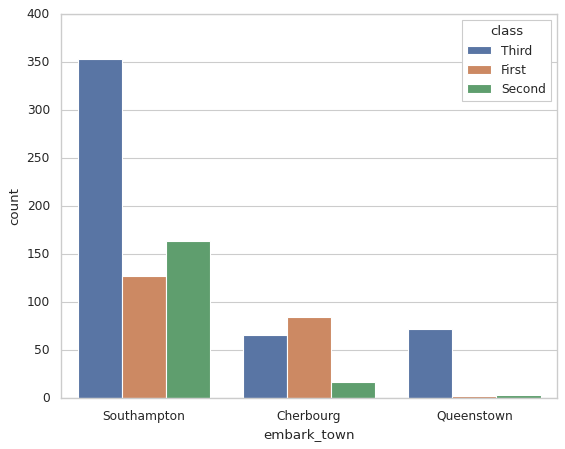

In [ ]:
## seaborn
## countplot
## atendiendo a clase y embarktown

sns.countplot(titanic, x='embark_town',hue='class')

<Axes: xlabel='embark_town', ylabel='count'>

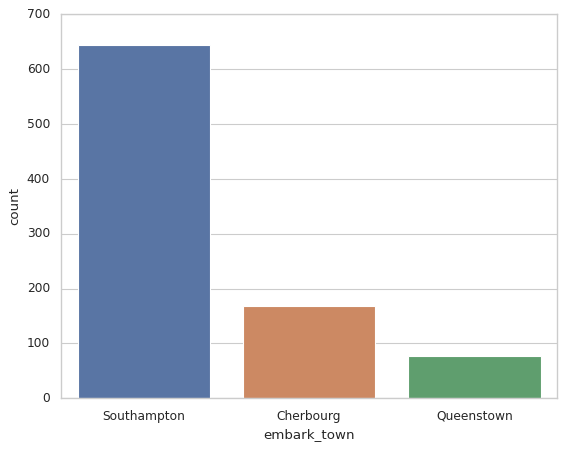

In [ ]:
sns.countplot(titanic, x='embark_town')

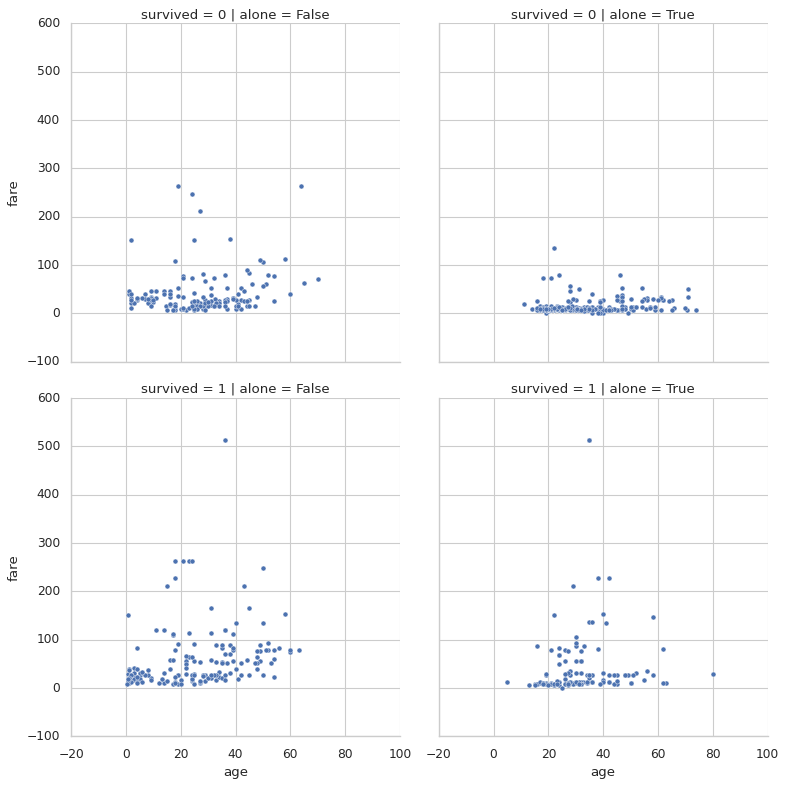

In [ ]:
# edad y tarifa, efecto aislado solo / acompañado y si sobrevivio o no



sns.relplot(titanic, x='age',y='fare',col='alone', row='survived')

In [ ]:
lusta = ['1','2','3']
lustb = ['1','2','3']

for a, b in zip (lusta,lustb):
  print (a+'..'+b)

1..1
2..2
3..3


In [ ]:
from itertools import product
lusta = ['1','2','3']
lustb = ['a','b','c']

for a, b in zip (lusta,lustb, strict=False):
  print (a+'..'+b)

1..a
2..b
3..c


In [ ]:
lusta = ['1','2','3']
lustb = ['A','B','C']

for a, b in product(lusta,lustb):
  print (a+'..'+b)

1..A
1..B
1..C
2..A
2..B
2..C
3..A
3..B
3..C
